**Import Libraries**

In [1]:
#import libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

Lets Load Data

In [2]:
#import dataset
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

The first dataset contains the following features:-

- movie_id - A unique identifier for each movie.<br>
- cast - The name of lead and supporting actors.<br>
- crew - The name of Director, Editor, Composer, Writer etc.<br>

The second dataset has the following features:-<br>

- budget - The budget in which the movie was made.<br>
- genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
- homepage - A link to the homepage of the movie.<br>
- id - This is infact the movie_id as in the first dataset.<br>
- keywords - The keywords or tags related to the movie.<br>
- original_language - The language in which the movie was made.<br>
- original_title - The title of the movie before translation or adaptation.<br>
- overview - A brief description of the movie.<br>
- popularity - A numeric quantity specifying the movie popularity.<br>
- production_companies - The production house of the movie.<br>
- production_countries - The country in which it was produced.<br>
- release_date - The date on which it was released.<br>
- revenue - The worldwide revenue generated by the movie.<br>
- runtime - The running time of the movie in minutes.<br>
- status - "Released" or "Rumored".<br>
- tagline - Movie's tagline.<br>
- title - Title of the movie.<br>
- vote_average - average ratings the movie recieved.<br>
- vote_count - the count of votes recieved.<br>

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We will be Droping the columns which is not required in the dataset

In [6]:
# drop the column which are not required.
movies.drop(['homepage' , 'production_companies' , 'production_countries' , 'spoken_languages'] , axis=1 , inplace=True)

In [7]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Lets Merge the two datasets.**

In [10]:
credits.rename(columns={'movie_id':'id'} , inplace=True)
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
credits.columns = ['id' ,'tittle' , 'cast' , 'crew']
movies = movies.merge(credits, on='id')
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'tittle', 'cast', 'crew'],
      dtype='object')

# Data Wrangling

In [13]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
#it shows the information of features like if it conatins any null value or what is the data type of that feature
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
budget               4803 non-null int64
genres               4803 non-null object
id                   4803 non-null int64
keywords             4803 non-null object
original_language    4803 non-null object
original_title       4803 non-null object
overview             4800 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
runtime              4801 non-null float64
status               4803 non-null object
tagline              3959 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
tittle               4803 non-null object
cast                 4803 non-null object
crew                 4803 non-null object
dtypes: float64(3), int64(4), object(12)
memory usage: 750.5+ KB


In [15]:
#check if feature contains any null value
movies.isnull().sum()

budget                 0
genres                 0
id                     0
keywords               0
original_language      0
original_title         0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
status                 0
tagline              844
title                  0
vote_average           0
vote_count             0
tittle                 0
cast                   0
crew                   0
dtype: int64

In [17]:
#drop duplicate columns
movies.drop(['tagline','tittle', 'original_title'],axis=1,inplace=True)

In [19]:
movies.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
# drop the rows with nan values
movies = movies.dropna()

In [22]:
#to check if any feature contains any NaN value
movies.isnull().sum()

budget               0
genres               0
id                   0
keywords             0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
title                0
vote_average         0
vote_count           0
cast                 0
crew                 0
dtype: int64

(-58000000.0, 98800000.0, 39200000.0)

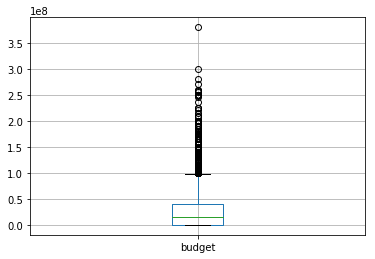

In [23]:
# box plot to check outliers for budget
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

(-139434778.5, 232391297.5, 92956519.0)

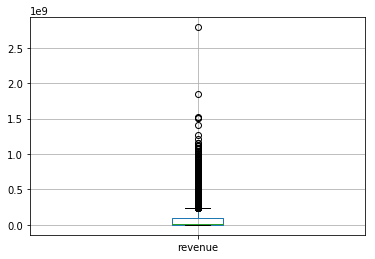

In [24]:
# box plot to check outliers for revenue
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

In [25]:
#remove outlier by the higher value of budget and revenue
movies.loc[movies.budget >= higher_fence1 , 'budget'] = higher_fence1
movies.loc[movies.revenue >= higher_fence , 'revenue'] = higher_fence

(-139434778.5, 232391297.5, 92956519.0)

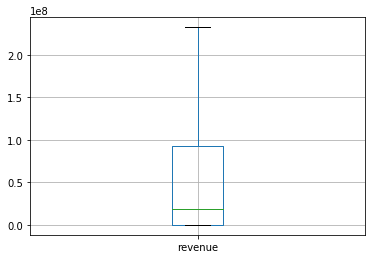

In [26]:
#check to if outlier still exist
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

(-58000000.0, 98800000.0, 39200000.0)

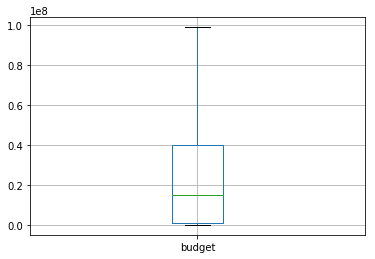

In [27]:
#check to if outlier still exist
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR